# Importando as bibliotecas

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

#configurando para que o pandas traga todas linhas e colunas do data_set
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
# Configurando o matplotlib para mostrar os gráficos no jupyter notebook
%matplotlib inline

# importando o nosso banco de dados
raw_csv_data=pd.read_csv("2023_Countries by Population.csv")
raw_csv_data


,place,pop1980,pop2000,pop2010,pop2022,pop2023,pop2030,pop2050,country,area,landAreaKm,cca2,cca3,netChange,growthRate,worldPercentage,density,densityMi,rank
0,356,696828385.0,1.059634e+09,1.240614e+09,1.417173e+09,1.428628e+09,1.514994e+09,1.670491e+09,India,3287590.00,2973190.00,IN,IND,0.4184,0.0081,0.1785,480.5033,1244.5036,1
1,156,982372466.0,1.264099e+09,1.348191e+09,1.425887e+09,1.425671e+09,1.415606e+09,1.312636e+09,China,9706961.00,9424702.90,CN,CHN,-0.0113,-0.0002,0.1781,151.2696,391.7884,2
2,840,223140018.0,2.823986e+08,3.111828e+08,3.382899e+08,3.399966e+08,3.521623e+08,3.753920e+08,United States,9372610.00,9147420.00,US,USA,0.0581,0.0050,0.0425,37.1686,96.2666,3
3,360,148177096.0,2.140724e+08,2.440162e+08,2.755013e+08,2.775341e+08,2.921501e+08,3.172252e+08,Indonesia,1904569.00,1877519.00,ID,IDN,0.0727,0.0074,0.0347,147.8196,382.8528,4
4,586,80624057.0,1.543699e+08,1.944545e+08,2.358249e+08,2.404857e+08,2.740298e+08,3.678085e+08,Pakistan,881912.00,770880.00,PK,PAK,0.1495,0.0198,0.0300,311.9625,807.9829,5
5,566,72951439.0,1.228520e+08,1.609529e+08,2.185412e+08,2.238046e+08,2.625804e+08,3.774599e+08,Nigeria,923768.00,910770.00,NG,NGA,0.1680,0.0241,0.0280,245.7312,636.4439,6
6,76,122288383.0,1.758737e+08,1.963535e+08,2.153135e+08,2.164224e+08,2.239090e+08,2.308857e+08,Brazil,8515767.00,8358140.00,BR,BRA,0.0393,0.0052,0.0270,25.8936,67.0645,7
7,50,83929765.0,1.291933e+08,1.483911e+08,1.711864e+08,1.729543e+08,1.844241e+08,2.039049e+08,Bangladesh,147570.00,130170.00,BD,BGD,0.0557,0.0103,0.0216,1328.6803,3441.2821,8
8,643,138257420.0,1.468448e+08,1.432426e+08,1.447133e+08,1.444444e+08,1.414327e+08,1.331330e+08,Russia,17098242.00,16376870.00,RU,RUS,-0.0158,-0.0019,0.0180,8.8200,22.8439,9
9,484,67705186.0,9.787344e+07,1.125324e+08,1.275041e+08,1.284556e+08,1.345341e+08,1.437724e+08,Mexico,1964375.00,1943950.00,MX,MEX,0.0299,0.0075,0.0160,66.0797,171.1463,10


## Lidando com valores em falta


* Preenchendo NA nos netchange com 0.000
* Preenchendo NA nos worldPercentage com 0.000;

In [4]:
#criando um checkpoint
df = raw_csv_data

In [5]:
df['netChange'] = df['netChange'].fillna(0.000)
df['worldPercentage'] = df['worldPercentage'].fillna(0.000)
df.dropna(inplace=True)
df.isnull().sum()

place              0
pop1980            0
pop2000            0
pop2010            0
pop2022            0
pop2023            0
pop2030            0
pop2050            0
country            0
area               0
landAreaKm         0
cca2               0
cca3               0
netChange          0
growthRate         0
worldPercentage    0
density            0
densityMi          0
rank               0
dtype: int64

In [6]:
df

,place,pop1980,pop2000,pop2010,pop2022,pop2023,pop2030,pop2050,country,area,landAreaKm,cca2,cca3,netChange,growthRate,worldPercentage,density,densityMi,rank
0,356,696828385.0,1.059634e+09,1.240614e+09,1.417173e+09,1.428628e+09,1.514994e+09,1.670491e+09,India,3287590.00,2973190.00,IN,IND,0.4184,0.0081,0.1785,480.5033,1244.5036,1
1,156,982372466.0,1.264099e+09,1.348191e+09,1.425887e+09,1.425671e+09,1.415606e+09,1.312636e+09,China,9706961.00,9424702.90,CN,CHN,-0.0113,-0.0002,0.1781,151.2696,391.7884,2
2,840,223140018.0,2.823986e+08,3.111828e+08,3.382899e+08,3.399966e+08,3.521623e+08,3.753920e+08,United States,9372610.00,9147420.00,US,USA,0.0581,0.0050,0.0425,37.1686,96.2666,3
3,360,148177096.0,2.140724e+08,2.440162e+08,2.755013e+08,2.775341e+08,2.921501e+08,3.172252e+08,Indonesia,1904569.00,1877519.00,ID,IDN,0.0727,0.0074,0.0347,147.8196,382.8528,4
4,586,80624057.0,1.543699e+08,1.944545e+08,2.358249e+08,2.404857e+08,2.740298e+08,3.678085e+08,Pakistan,881912.00,770880.00,PK,PAK,0.1495,0.0198,0.0300,311.9625,807.9829,5
5,566,72951439.0,1.228520e+08,1.609529e+08,2.185412e+08,2.238046e+08,2.625804e+08,3.774599e+08,Nigeria,923768.00,910770.00,NG,NGA,0.1680,0.0241,0.0280,245.7312,636.4439,6
6,76,122288383.0,1.758737e+08,1.963535e+08,2.153135e+08,2.164224e+08,2.239090e+08,2.308857e+08,Brazil,8515767.00,8358140.00,BR,BRA,0.0393,0.0052,0.0270,25.8936,67.0645,7
7,50,83929765.0,1.291933e+08,1.483911e+08,1.711864e+08,1.729543e+08,1.844241e+08,2.039049e+08,Bangladesh,147570.00,130170.00,BD,BGD,0.0557,0.0103,0.0216,1328.6803,3441.2821,8
8,643,138257420.0,1.468448e+08,1.432426e+08,1.447133e+08,1.444444e+08,1.414327e+08,1.331330e+08,Russia,17098242.00,16376870.00,RU,RUS,-0.0158,-0.0019,0.0180,8.8200,22.8439,9
9,484,67705186.0,9.787344e+07,1.125324e+08,1.275041e+08,1.284556e+08,1.345341e+08,1.437724e+08,Mexico,1964375.00,1943950.00,MX,MEX,0.0299,0.0075,0.0160,66.0797,171.1463,10


In [7]:
#O Data_set possui 233 linhas e 19 colunas
df.shape

(233, 19)

In [8]:
# Criando um somatório para comprar o crescimento populacional em cada ano
pop_1980 = df['pop1980'].sum()
pop_2000 = df['pop2000'].sum()
pop_2010 = df['pop2010'].sum()
pop_2022 = df['pop2022'].sum()
pop_2023 = df['pop2023'].sum()
pop_2030 = df['pop2030'].sum()
pop_2050 = df['pop2050'].sum()

In [9]:
#Criando Listas para a construção do gráfico
valores = [pop_1980, pop_2000, pop_2010, pop_2022, pop_2023, pop_2030, pop_2050]
rotulos = ['1980', '2000', '2010', '2022', '2023', '2030', '2050']

# Gráfico sobre o crescimento mundial

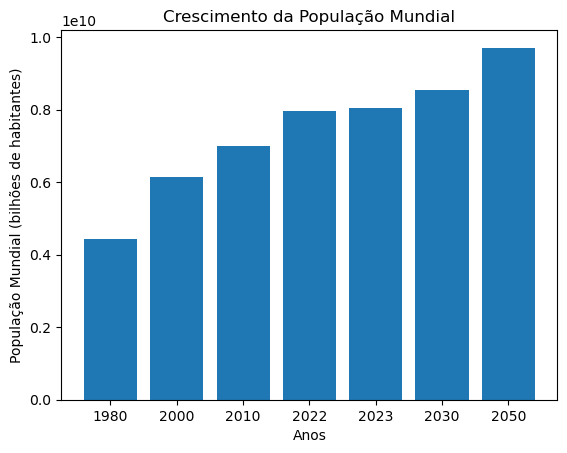

In [10]:
#Criando um gráfico de barras
plt.bar(rotulos, valores)
plt.xlabel('Anos')
plt.ylabel('População Mundial (bilhões de habitantes)')
plt.title('Crescimento da População Mundial')
plt.show()

# Estudo sobre o crescimento da população de Angola

In [11]:
# Filtra apenas os dados de Angola
dados_de_angola = df.loc[df['country'] == 'Angola']

# Imprime os dados de Angola
print(dados_de_angola)

    place    pop1980     pop2000     pop2010     pop2022     pop2023  \
41     24  8330047.0  16394062.0  23364185.0  35588987.0  36684202.0   

       pop2030     pop2050 country       area  landAreaKm cca2 cca3  \
41  44911664.0  72328068.0  Angola  1246700.0   1246700.0   AO  AGO   

    netChange  growthRate  worldPercentage  density  densityMi  rank  
41     0.0352      0.0308           0.0046   29.425    76.2109    42  


In [12]:
p_1980 = dados_de_angola['pop1980'].sum()
p_2000 = dados_de_angola['pop2000'].sum()
p_2010 = dados_de_angola['pop2010'].sum()
p_2022 = dados_de_angola['pop2022'].sum()
p_2023 = dados_de_angola['pop2023'].sum()
p_2030 = dados_de_angola['pop2030'].sum()
p_2050 = dados_de_angola['pop2050'].sum()

print(p_2050)

72328068.0


In [15]:
#Criando Listas para a construção do gráfico
valores1 = [p_1980, p_2000, p_2010, p_2022, p_2023, p_2030, p_2050]
rotulos2 = ['1980','2000','2010','2022','2023','2030','2050']

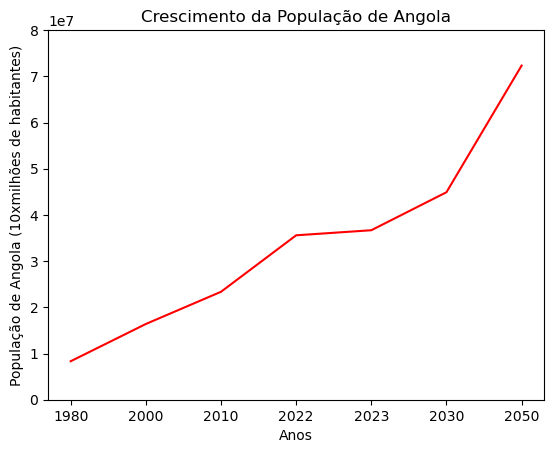

In [16]:
#Criando um gráfico de barras
plt.plot(rotulos2, valores1, color= 'red')
plt.xlabel('Anos')
plt.ylabel('População de Angola (10xmilhões de habitantes)')
plt.title('Crescimento da População de Angola')

# Definindo a escala do eixo y
plt.ylim([0, 80000000])

plt.show()

In [17]:
df

,place,pop1980,pop2000,pop2010,pop2022,pop2023,pop2030,pop2050,country,area,landAreaKm,cca2,cca3,netChange,growthRate,worldPercentage,density,densityMi,rank
0,356,696828385.0,1.059634e+09,1.240614e+09,1.417173e+09,1.428628e+09,1.514994e+09,1.670491e+09,India,3287590.00,2973190.00,IN,IND,0.4184,0.0081,0.1785,480.5033,1244.5036,1
1,156,982372466.0,1.264099e+09,1.348191e+09,1.425887e+09,1.425671e+09,1.415606e+09,1.312636e+09,China,9706961.00,9424702.90,CN,CHN,-0.0113,-0.0002,0.1781,151.2696,391.7884,2
2,840,223140018.0,2.823986e+08,3.111828e+08,3.382899e+08,3.399966e+08,3.521623e+08,3.753920e+08,United States,9372610.00,9147420.00,US,USA,0.0581,0.0050,0.0425,37.1686,96.2666,3
3,360,148177096.0,2.140724e+08,2.440162e+08,2.755013e+08,2.775341e+08,2.921501e+08,3.172252e+08,Indonesia,1904569.00,1877519.00,ID,IDN,0.0727,0.0074,0.0347,147.8196,382.8528,4
4,586,80624057.0,1.543699e+08,1.944545e+08,2.358249e+08,2.404857e+08,2.740298e+08,3.678085e+08,Pakistan,881912.00,770880.00,PK,PAK,0.1495,0.0198,0.0300,311.9625,807.9829,5
5,566,72951439.0,1.228520e+08,1.609529e+08,2.185412e+08,2.238046e+08,2.625804e+08,3.774599e+08,Nigeria,923768.00,910770.00,NG,NGA,0.1680,0.0241,0.0280,245.7312,636.4439,6
6,76,122288383.0,1.758737e+08,1.963535e+08,2.153135e+08,2.164224e+08,2.239090e+08,2.308857e+08,Brazil,8515767.00,8358140.00,BR,BRA,0.0393,0.0052,0.0270,25.8936,67.0645,7
7,50,83929765.0,1.291933e+08,1.483911e+08,1.711864e+08,1.729543e+08,1.844241e+08,2.039049e+08,Bangladesh,147570.00,130170.00,BD,BGD,0.0557,0.0103,0.0216,1328.6803,3441.2821,8
8,643,138257420.0,1.468448e+08,1.432426e+08,1.447133e+08,1.444444e+08,1.414327e+08,1.331330e+08,Russia,17098242.00,16376870.00,RU,RUS,-0.0158,-0.0019,0.0180,8.8200,22.8439,9
9,484,67705186.0,9.787344e+07,1.125324e+08,1.275041e+08,1.284556e+08,1.345341e+08,1.437724e+08,Mexico,1964375.00,1943950.00,MX,MEX,0.0299,0.0075,0.0160,66.0797,171.1463,10


# Comparação dos 10 países mais populosos do mundo (2023)

In [18]:
# Filtra os 10 primeiros país do data set
rank_10 = df.iloc[:10, :]


rank_10

,place,pop1980,pop2000,pop2010,pop2022,pop2023,pop2030,pop2050,country,area,landAreaKm,cca2,cca3,netChange,growthRate,worldPercentage,density,densityMi,rank
0,356,696828385.0,1.059634e+09,1.240614e+09,1.417173e+09,1.428628e+09,1.514994e+09,1.670491e+09,India,3287590.0,2973190.0,IN,IND,0.4184,0.0081,0.1785,480.5033,1244.5036,1
1,156,982372466.0,1.264099e+09,1.348191e+09,1.425887e+09,1.425671e+09,1.415606e+09,1.312636e+09,China,9706961.0,9424702.9,CN,CHN,-0.0113,-0.0002,0.1781,151.2696,391.7884,2
2,840,223140018.0,2.823986e+08,3.111828e+08,3.382899e+08,3.399966e+08,3.521623e+08,3.753920e+08,United States,9372610.0,9147420.0,US,USA,0.0581,0.0050,0.0425,37.1686,96.2666,3
3,360,148177096.0,2.140724e+08,2.440162e+08,2.755013e+08,2.775341e+08,2.921501e+08,3.172252e+08,Indonesia,1904569.0,1877519.0,ID,IDN,0.0727,0.0074,0.0347,147.8196,382.8528,4
4,586,80624057.0,1.543699e+08,1.944545e+08,2.358249e+08,2.404857e+08,2.740298e+08,3.678085e+08,Pakistan,881912.0,770880.0,PK,PAK,0.1495,0.0198,0.0300,311.9625,807.9829,5
5,566,72951439.0,1.228520e+08,1.609529e+08,2.185412e+08,2.238046e+08,2.625804e+08,3.774599e+08,Nigeria,923768.0,910770.0,NG,NGA,0.1680,0.0241,0.0280,245.7312,636.4439,6
6,76,122288383.0,1.758737e+08,1.963535e+08,2.153135e+08,2.164224e+08,2.239090e+08,2.308857e+08,Brazil,8515767.0,8358140.0,BR,BRA,0.0393,0.0052,0.0270,25.8936,67.0645,7
7,50,83929765.0,1.291933e+08,1.483911e+08,1.711864e+08,1.729543e+08,1.844241e+08,2.039049e+08,Bangladesh,147570.0,130170.0,BD,BGD,0.0557,0.0103,0.0216,1328.6803,3441.2821,8
8,643,138257420.0,1.468448e+08,1.432426e+08,1.447133e+08,1.444444e+08,1.414327e+08,1.331330e+08,Russia,17098242.0,16376870.0,RU,RUS,-0.0158,-0.0019,0.0180,8.8200,22.8439,9
9,484,67705186.0,9.787344e+07,1.125324e+08,1.275041e+08,1.284556e+08,1.345341e+08,1.437724e+08,Mexico,1964375.0,1943950.0,MX,MEX,0.0299,0.0075,0.0160,66.0797,171.1463,10


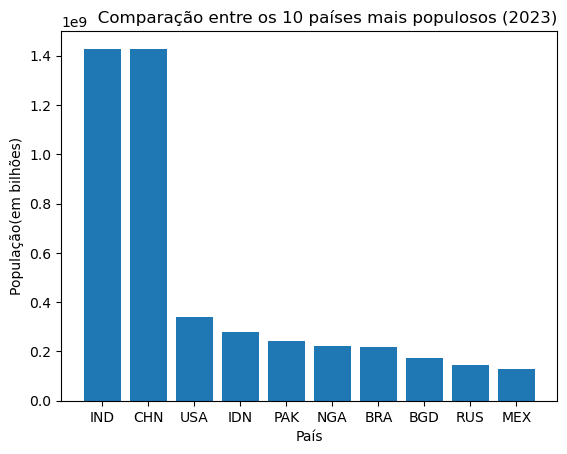

In [22]:
# Cria um gráfico de barras com o número de população em 2023 
plt.bar(rank_10['cca3'], rank_10['pop2023'])
plt.xlabel('País')
plt.ylabel('População(em bilhões)')
plt.title('       Comparação entre os 10 países mais populosos (2023)')
plt.show()

# Comparação dos 10 países com maior densidade populacional/Km

In [24]:
# Selecionando as 10 maiores densidades populacionais
df_top10 = df.nlargest(10, 'density')

# Exibindo o resultado
df_top10

,place,pop1980,pop2000,pop2010,pop2022,pop2023,pop2030,pop2050,country,area,landAreaKm,cca2,cca3,netChange,growthRate,worldPercentage,density,densityMi,rank
166,446,245332.0,431896.0,557297.0,695168.0,704149.0,763371.0,881666.0,Macau,32.90,32.9,MO,MAC,0.0003,0.0129,0.0001,21402.7052,55433.0064,167
216,492,27076.0,32465.0,33178.0,36469.0,36297.0,35862.0,37664.0,Monaco,2.02,2.0,MC,MCO,0.0000,-0.0047,0.0000,18148.5000,47004.6150,217
113,702,2400729.0,4053602.0,5163590.0,5975689.0,6014723.0,6251988.0,6337235.0,Singapore,710.00,718.0,SG,SGP,0.0012,0.0065,0.0008,8377.0515,21696.5635,114
103,344,4978544.0,6731195.0,7132438.0,7488865.0,7491609.0,7485887.0,6975391.0,Hong Kong,1104.00,1050.0,HK,HKG,0.0002,0.0004,0.0009,7134.8657,18479.3022,104
218,292,28734.0,27741.0,31262.0,32649.0,32688.0,32771.0,31356.0,Gibraltar,6.80,6.8,GI,GIB,0.0000,0.0012,0.0000,4807.0588,12450.2824,219
153,48,362595.0,711442.0,1213645.0,1472233.0,1485509.0,1574679.0,1809237.0,Bahrain,765.00,785.0,BH,BHR,0.0004,0.0090,0.0002,1892.3682,4901.2335,154
173,462,164887.0,282507.0,361575.0,523787.0,521021.0,512683.0,569909.0,Maldives,300.00,300.0,MV,MDV,-0.0001,-0.0053,0.0001,1736.7367,4498.1480,174
172,470,333587.0,399212.0,418755.0,533286.0,535064.0,543425.0,522737.0,Malta,316.00,320.0,MT,MLT,0.0001,0.0033,0.0001,1672.0750,4330.6743,173
7,50,83929765.0,129193327.0,148391139.0,171186372.0,172954319.0,184424144.0,203904900.0,Bangladesh,147570.00,130170.0,BD,BGD,0.0557,0.0103,0.0216,1328.6803,3441.2821,8
212,534,12243.0,30489.0,33034.0,44175.0,44222.0,44946.0,38947.0,Sint Maarten,34.00,34.0,SX,SXM,0.0000,0.0011,0.0000,1300.6471,3368.6759,213


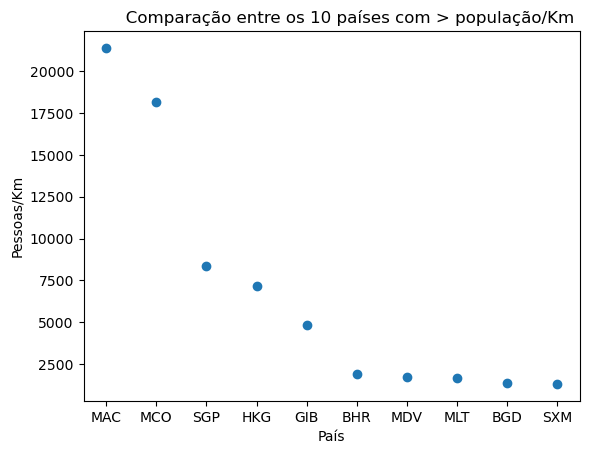

In [25]:
# Cria um gráfico de barras com o número de população em 2023 
plt.scatter(df_top10['cca3'], df_top10['density'])
plt.xlabel('País')
plt.ylabel('Pessoas/Km')
plt.title('       Comparação entre os 10 países com > população/Km')
plt.show()

# Comparação dos 10 países com maior taxa de crescimento populacional

In [26]:
# Selecionando as 10 países com maior taxa de crescimento
growth_top10 = df.nlargest(10, 'growthRate')

# Exibindo o resultado
growth_top10

,place,pop1980,pop2000,pop2010,pop2022,pop2023,pop2030,pop2050,country,area,landAreaKm,cca2,cca3,netChange,growthRate,worldPercentage,density,densityMi,rank
59,760,8898954.0,16307654.0,22337563.0,22125249.0,23227014.0,29824735.0,38306374.0,Syria,185180.0,183630.0,SY,SYR,0.0359,0.0498,0.0029,126.4881,327.6042,60
133,498,4103240.0,4251573.0,3678186.0,3272996.0,3435931.0,3174727.0,2997532.0,Moldova,33846.0,32884.6,MD,MDA,-0.0039,0.0498,0.0004,104.4845,270.6149,134
53,562,6173177.0,11622665.0,16647543.0,26207977.0,27202843.0,35217942.0,67043296.0,Niger,1267000.0,1266700.0,NE,NER,0.0321,0.0380,0.0034,21.4754,55.6212,54
14,180,26708686.0,48616317.0,66391257.0,99010212.0,102262808.0,127582053.0,217494003.0,DR Congo,2344858.0,2267050.0,CD,COD,0.1050,0.0329,0.0128,45.1083,116.8305,15
66,148,4408230.0,8259137.0,11894727.0,17723315.0,18278568.0,22460393.0,36452035.0,Chad,1284000.0,1259200.0,TD,TCD,0.0178,0.0313,0.0023,14.5160,37.5965,67
57,466,7372581.0,11239101.0,15529181.0,22593590.0,23293698.0,28712294.0,47439802.0,Mali,1240192.0,1220190.0,ML,MLI,0.0225,0.0310,0.0029,19.0902,49.4437,58
68,706,5892224.0,8721465.0,12026649.0,17597511.0,18143378.0,22316857.0,36462830.0,Somalia,637657.0,627340.0,SO,SOM,0.0176,0.0310,0.0023,28.9211,74.9057,69
41,24,8330047.0,16394062.0,23364185.0,35588987.0,36684202.0,44911664.0,72328068.0,Angola,1246700.0,1246700.0,AO,AGO,0.0352,0.0308,0.0046,29.4250,76.2109,42
180,175,52233.0,159215.0,211786.0,326101.0,335995.0,407579.0,664141.0,Mayotte,374.0,374.0,YT,MYT,0.0003,0.0303,0.0000,898.3824,2326.8103,181
21,834,19297659.0,34463704.0,45110527.0,65497748.0,67438106.0,81885304.0,129931520.0,Tanzania,945087.0,885800.0,TZ,TZA,0.0622,0.0296,0.0084,76.1324,197.1830,22


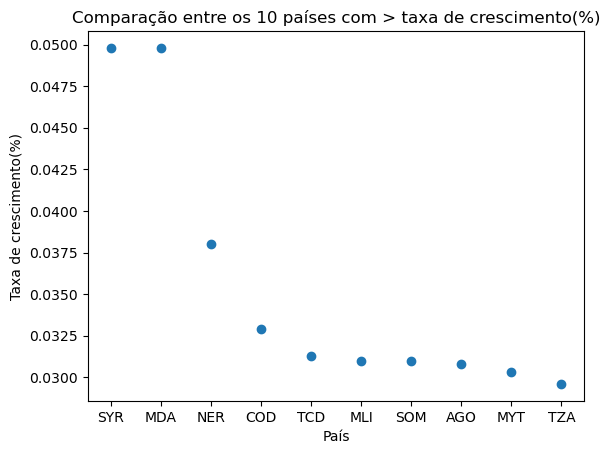

In [27]:
# Cria um gráfico de dispersão do países com maior taxa de crescimento 
plt.scatter(growth_top10['cca3'], growth_top10['growthRate'])
plt.xlabel('País')
plt.ylabel('Taxa de crescimento(%)')
plt.title('Comparação entre os 10 países com > taxa de crescimento(%)')
plt.show()

# Comparação dos 10 países com menor taxa de crescimento populacional

In [28]:
# Selecionando as 10 países com menor taxa de crescimento
growth_buttom10 = df.nsmallest(10, 'growthRate')

# Exibindo o resultado
growth_buttom10

,place,pop1980,pop2000,pop2010,pop2022,pop2023,pop2030,pop2050,country,area,landAreaKm,cca2,cca3,netChange,growthRate,worldPercentage,density,densityMi,rank
40,804,49973920.0,48879755.0,45683020.0,39701739.0,36744634.0,38295429.0,32867719.0,Ukraine,603500.0,579400.0,UA,UKR,0.0428,-0.0745,0.0046,63.4184,164.2537,41
121,422,2963702.0,4320642.0,4995800.0,5489739.0,5353930.0,4714240.0,4937579.0,Lebanon,10452.0,10230.0,LB,LBN,-0.0045,-0.0247,0.0007,523.3558,1355.4916,122
109,100,8980606.0,8097691.0,7592273.0,6781953.0,6687717.0,6290166.0,5187392.0,Bulgaria,110879.0,108560.0,BG,BGR,-0.0027,-0.0139,0.0008,61.6039,159.5540,110
141,440,3521206.0,3599637.0,3139019.0,2750055.0,2718352.0,2558928.0,2187550.0,Lithuania,65300.0,62620.0,LT,LTU,-0.0008,-0.0115,0.0003,43.4103,112.4326,142
150,428,2572037.0,2392530.0,2101530.0,1850651.0,1830211.0,1701338.0,1433728.0,Latvia,64559.0,62230.0,LV,LVA,-0.0006,-0.0110,0.0002,29.4104,76.1730,151
104,688,7777010.0,7935022.0,7653748.0,7221365.0,7149077.0,6832604.0,5777806.0,Serbia,88361.0,87460.0,RS,SRB,-0.0020,-0.0100,0.0009,81.7411,211.7095,105
213,16,32886.0,58230.0,54849.0,44273.0,43914.0,41142.0,33557.0,American Samoa,199.0,200.0,AS,ASM,0.0000,-0.0081,0.0000,219.5700,568.6863,214
199,850,96640.0,108185.0,106142.0,99465.0,98750.0,93419.0,77519.0,United States Virgin Islands,347.0,347.0,VI,VIR,0.0000,-0.0072,0.0000,284.5821,737.0677,200
136,70,4199820.0,4179350.0,3811088.0,3233526.0,3210847.0,3111789.0,2739014.0,Bosnia and Herzegovina,51209.0,51200.0,BA,BIH,-0.0006,-0.0070,0.0004,62.7119,162.4237,137
225,876,11315.0,14723.0,13142.0,11572.0,11502.0,11229.0,11349.0,Wallis and Futuna,274.0,274.0,WF,WLF,0.0000,-0.0060,0.0000,41.9781,108.7233,226


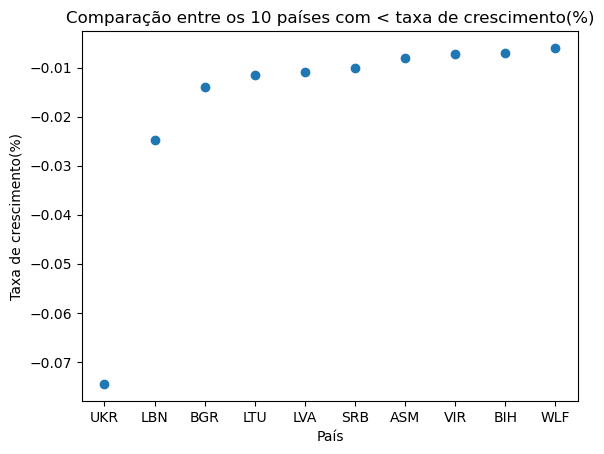

In [29]:
# Cria um gráfico de dispersão do países com menor taxa de crescimento 
plt.scatter(growth_buttom10['cca3'], growth_buttom10['growthRate'])
plt.xlabel('País')
plt.ylabel('Taxa de crescimento(%)')
plt.title('Comparação entre os 10 países com < taxa de crescimento(%)')
plt.show()

# Estudo do declínio do crescimento populacional de Ucrânia

In [30]:
# Filtra apenas os dados de Ucrânia
dados_de_ucrania = df.loc[df['country'] == 'Ukraine']

# Imprime os dados de Ucrânia
print(dados_de_ucrania)

    place     pop1980     pop2000     pop2010     pop2022     pop2023  \
40    804  49973920.0  48879755.0  45683020.0  39701739.0  36744634.0   

       pop2030     pop2050  country      area  landAreaKm cca2 cca3  \
40  38295429.0  32867719.0  Ukraine  603500.0    579400.0   UA  UKR   

    netChange  growthRate  worldPercentage  density  densityMi  rank  
40     0.0428     -0.0745           0.0046  63.4184   164.2537    41  


In [32]:
pu_1980 = dados_de_ucrania['pop1980'].sum()
pu_2000 = dados_de_ucrania['pop2000'].sum()
pu_2010 = dados_de_ucrania['pop2010'].sum()
pu_2022 = dados_de_ucrania['pop2022'].sum()
pu_2023 = dados_de_ucrania['pop2023'].sum()
pu_2030 = dados_de_ucrania['pop2030'].sum()
pu_2050 = dados_de_ucrania['pop2050'].sum()

print(pu_2050)

32867719.0


In [33]:
#Criando Listas para a construção do gráfico
valores2 = [pu_1980, pu_2000, pu_2010, pu_2022, pu_2023, pu_2030, pu_2050]
rotulos3 = ['1980','2000','2010','2022','2023','2030','2050']

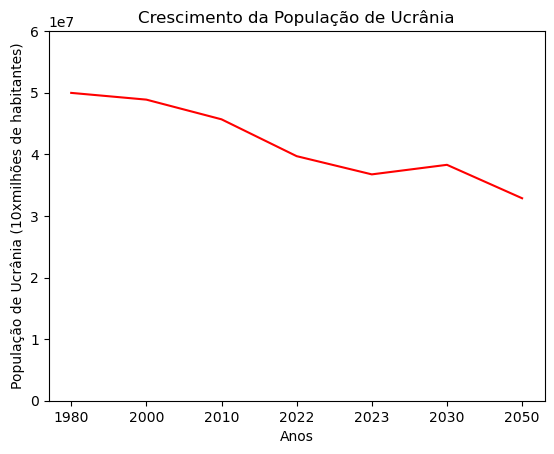

In [34]:
#Criando um gráfico de linhas
plt.plot(rotulos3, valores2, color = 'red')
plt.xlabel('Anos')
plt.ylabel('População de Ucrânia (10xmilhões de habitantes)')
plt.title('Crescimento da População de Ucrânia')

# Definindo a escala do eixo y
plt.ylim([0, 60000000])

plt.show()

In [37]:
# Selecionando as 15 países com maior área/km2
area_top15 = df.nlargest(15, 'area')

# Exibindo o resultado
area_top15

,place,pop1980,pop2000,pop2010,pop2022,pop2023,pop2030,pop2050,country,area,landAreaKm,cca2,cca3,netChange,growthRate,worldPercentage,density,densityMi,rank
8,643,138257420.0,1.468448e+08,1.432426e+08,1.447133e+08,1.444444e+08,1.414327e+08,1.331330e+08,Russia,17098242.0,16376870.0,RU,RUS,-0.0158,-0.0019,0.0180,8.8200,22.8439,9
37,124,24511510.0,3.068331e+07,3.396341e+07,3.845433e+07,3.878129e+07,4.100860e+07,4.589082e+07,Canada,9984670.0,8965590.0,CA,CAN,0.0104,0.0085,0.0048,4.3256,11.2032,38
1,156,982372466.0,1.264099e+09,1.348191e+09,1.425887e+09,1.425671e+09,1.415606e+09,1.312636e+09,China,9706961.0,9424702.9,CN,CHN,-0.0113,-0.0002,0.1781,151.2696,391.7884,2
2,840,223140018.0,2.823986e+08,3.111828e+08,3.382899e+08,3.399966e+08,3.521623e+08,3.753920e+08,United States,9372610.0,9147420.0,US,USA,0.0581,0.0050,0.0425,37.1686,96.2666,3
6,76,122288383.0,1.758737e+08,1.963535e+08,2.153135e+08,2.164224e+08,2.239090e+08,2.308857e+08,Brazil,8515767.0,8358140.0,BR,BRA,0.0393,0.0052,0.0270,25.8936,67.0645,7
54,36,14706322.0,1.901796e+07,2.201917e+07,2.617741e+07,2.643911e+07,2.820241e+07,3.219292e+07,Australia,7692024.0,7692020.0,AU,AUS,0.0083,0.0100,0.0033,3.4372,8.9024,55
0,356,696828385.0,1.059634e+09,1.240614e+09,1.417173e+09,1.428628e+09,1.514994e+09,1.670491e+09,India,3287590.0,2973190.0,IN,IND,0.4184,0.0081,0.1785,480.5033,1244.5036,1
32,32,28024803.0,3.707077e+07,4.110012e+07,4.551032e+07,4.577388e+07,4.767856e+07,5.162118e+07,Argentina,2780400.0,2736690.0,AR,ARG,0.0091,0.0058,0.0057,16.7260,43.3203,33
65,398,14172710.0,1.523625e+07,1.662784e+07,1.939800e+07,1.960663e+07,2.112822e+07,2.560998e+07,Kazakhstan,2724900.0,2699700.0,KZ,KAZ,0.0067,0.0108,0.0024,7.2625,18.8099,66
33,12,18739378.0,3.077462e+07,3.585634e+07,4.490322e+07,4.560648e+07,4.978728e+07,6.000111e+07,Algeria,2381741.0,2381741.0,DZ,DZA,0.0218,0.0157,0.0057,19.1484,49.5943,34


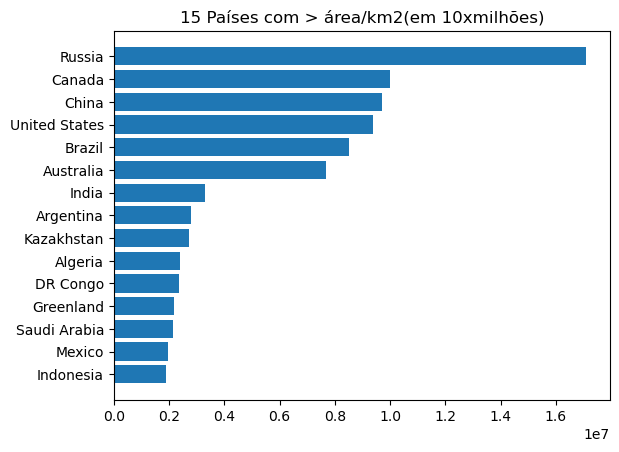

In [48]:
# Cria um gráfico de barras invertido do países com maior área/km2 

# Dados
valores = area_top15['area']
rotulos = area_top15['country']
#invertendo a ordem com que aparecem os dados 
valores = valores[::-1]
rotulos = rotulos[::-1]

# Definindo as posições das barras
posicoes = range(len(valores))

# Criando o gráfico de barras invertido
plt.barh(posicoes, valores, align='center')


# Definindo os rótulos do eixo y
plt.yticks(posicoes, rotulos)

# Definindo o título do gráfico
plt.title('15 Países com > área/km2(em 10xmilhões)')



# Exibindo o gráfico
plt.show()